# I- Chargement des données:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import DistanceMetric
from sklearn.decomposition import PCA
from time import perf_counter 

In [ ]:
def plot_gallery(images):
# Affiche les 12 premières images contenues dans images
# images est de taille Nb image*Ny*Nx
 plt.figure(figsize=(7.2, 7.2))
 plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
 for i in range(12):
  plt.subplot(3, 4, i + 1)
  plt.imshow(images[i], cmap=plt.cm.gray)
  plt.xticks(())
  plt.yticks(())
plt.show()

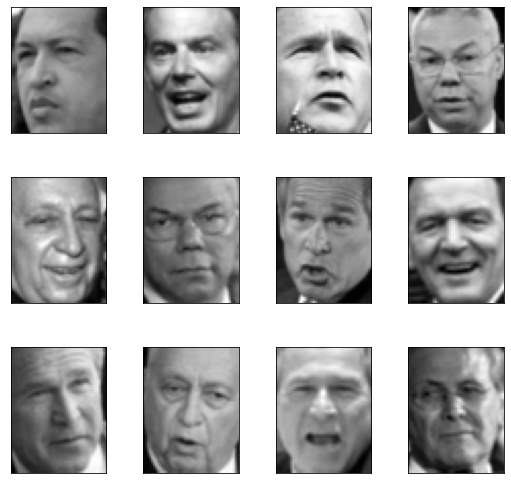

In [ ]:
#Charger et afficher les données :
[X, y, name]=np.load("TP1.npy",allow_pickle=True )
plot_gallery(X)

In [ ]:
print("la taille des images est : ", len(X[0]),'x',len(X[0][0]),"pixels")
print("le nombre  d'images est : ", len(y))
print("le nombre de classes est : ", len(name))

la taille des images est :  62 x 47 pixels
le nombre  d'images est :  1288
le nombre de classes est :  7


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for i,n in enumerate(name):
  print(i+1,": ",n)

1 :  Ariel Sharon
2 :  Colin Powell
3 :  Donald Rumsfeld
4 :  George W Bush
5 :  Gerhard Schroeder
6 :  Hugo Chavez
7 :  Tony Blair


In [ ]:
print("Les classes ne sont pas équiprobables")

Les classes ne sont pas équiprobables


(array([ 77., 236., 121., 530., 109.,  71., 144.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <a list of 7 Patch objects>)

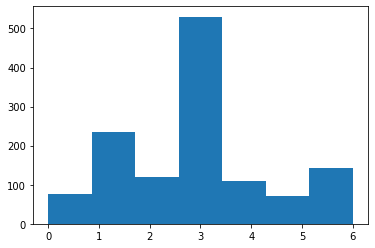

In [ ]:
plt.hist(y,bins=7)

In [ ]:
 X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print("nombre d'images en train : ", len(X_train))
print("nombre d'images en test : ", len(X_test))

print("Dimensions de X_train : ", np.shape(X_train))
print("Dimensions de X_test : ", np.shape(X_test))
print("Dimensions de y_train : ", len(y_train))
print("Dimensions de y_test : ", len(y_test))


nombre d'images en train :  966
nombre d'images en test :  322
Dimensions de X_train :  (966, 62, 47)
Dimensions de X_test :  (322, 62, 47)
Dimensions de y_train :  966
Dimensions de y_test :  322


### III. Prétraitement des données:

In [ ]:
# a. Redimensionnement des données:
X_train=np.reshape(X_train,(966,2914))
X_test=np.reshape(X_test,(322,2914))
X_train.shape,X_test.shape

((966, 2914), (322, 2914))

In [ ]:
# b. Mise en forme des données pour la classification:
Scaler=StandardScaler()
Scaler.fit(X_train)
X_train=Scaler.transform(X_train)
X_test=Scaler.transform(X_test)

Standardiser les fonctionnalités en supprimant la moyenne et en mettant à l'échelle la variance unitaire

Le score standard d'un échantillon x est calculé comme suit:

z = (x - u) / s

Où u est la moyenne des échantillons d'apprentissage ou 0 si with_mean=False, et s est l'écart type des échantillons d'apprentissage ou 1 si with_std=False.

Le centrage et la mise à l'échelle se produisent indépendamment sur chaque fonctionnalité en calculant les statistiques pertinentes sur les échantillons de l'ensemble d'apprentissage. La moyenne et l'écart type sont ensuite stockés pour être utilisés sur des données ultérieures à l'aide de la transformation.

#III. Classification par les KPPV:

In [ ]:
#a. Classifieur 1PPV:
neigh = KNeighborsClassifier(n_neighbors=1,p=2)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
print(confusion_matrix(y_test, y_pred, labels=range(7)),"\n")
print("taux de reconnaissance : ",accuracy_score(y_test, y_pred))

[[  5   1   0   4   2   1   0]
 [  2  31   4  12   4   3   4]
 [  3   5  15   4   0   0   0]
 [  2   5   9 102   6   7  15]
 [  1   2   3   5   9   1   4]
 [  0   1   0   4   2   8   0]
 [  1   3   2  10   2   2  16]] 

taux de reconnaissance :  0.577639751552795


In [ ]:
(5+31+15+102+9+8+16)/sum(sum(confusion_matrix(y_test, y_pred, labels=range(7))))

0.577639751552795

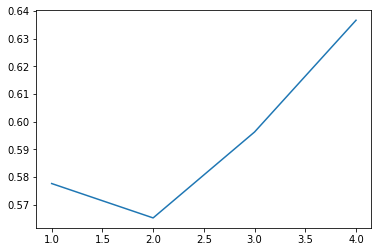

In [ ]:
#b. Classifieur KPPV:
score=[]
kplot=[]
for k in range(1,5,1):
  neigh = KNeighborsClassifier(n_neighbors=k,p=2)
  neigh.fit(X_train, y_train)
  y_pred=neigh.predict(X_test)
  score.append(accuracy_score(y_test, y_pred))
  kplot.append(k)
 
 
# Variation du taux de reconnaissance en fonction de k :
plt.plot(kplot,score)

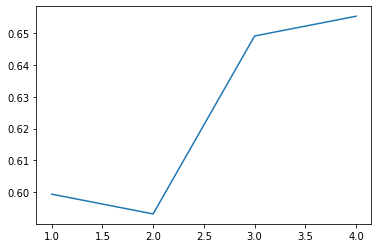

In [ ]:
#c. Classifieur KPPV et distance de Manhattan:
score=[]
kplot=[]
for k in range(1,5,1):
  neigh = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
  neigh.fit(X_train, y_train)
  y_pred=neigh.predict(X_test)
  score.append(accuracy_score(y_test, y_pred))
  kplot.append(k)


# Variation du taux de reconnaissance en fonction de k :
plt.plot(kplot,score)



## TP2: Analyse en composantes principales, classification et reconstruction :

I. Chargement et mise en forme des données:


In [ ]:
print("il y a", len(X_train) ,"données en apprentissage")
print("il y a",len(X_test) ,"données en test")
print("la dimension des données après redimensionnement :  X_train dimension = " ,X_train.shape," X_test dimension = ",X_test.shape)

il y a 966 données en apprentissage
il y a 322 données en test
la dimension des données après redimensionnement :  X_train dimension =  (966, 2914)  X_test dimension =  (322, 2914)


II. Analyse en composantes principales et classification

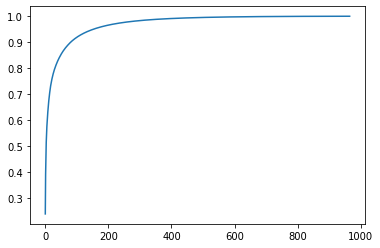

In [ ]:
#1. 
pca = PCA(n_components=None)
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))


In [ ]:
#2.
pca = PCA(n_components=100)
pca.fit(X_train)
X_train1=pca.transform(X_train)
X_test1=pca.transform(X_test)

In [ ]:
#3. a- Classifieur 5PPV sur les données de depart:
tps1 = perf_counter() 
neigh = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
print("taux de reconnaissance : ",accuracy_score(y_test, y_pred))
tps2 = perf_counter()
print("Durée de classification",tps2 - tps1)

taux de reconnaissance :  0.6645962732919255
Durée de classification 1.9889319740000246


In [ ]:
#3. b- Classifieur 5PPV sur les nouvelles données:
tps1_acp = perf_counter() 
neigh = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
neigh.fit(X_train1, y_train)
y_pred1=neigh.predict(X_test1)
print("taux de reconnaissance : ",accuracy_score(y_test, y_pred1))
tps2_acp = perf_counter()
print("Durée de classification",tps2_acp - tps1_acp)

taux de reconnaissance :  0.6987577639751553
Durée de classification 0.09004652199996599


Questions :

1. Les valeurs renvoyées par pca.explained_variance_ratio_  représentent: Les valeurs propres exprimées en pourcentage de la variance expliquée par chacune des composantes sélectionnées.

In [ ]:
#2.
print("Les nouvelles dimensions des données  X_train1 et X_test1 sont : X_train1 dimension = " ,X_train1.shape," X_test1 dimension = ",X_test1.shape,"\n")
print("Le temps de calcul dans une classification avec  ACP: ", tps2_acp - tps1_acp)
print("Le taux de reconnaissance dans une classification avec  ACP : ",accuracy_score(y_test, y_pred1),"\n" )
print("Le temps de calcul dans une classification sans  ACP: ", tps2 - tps1)
print("Le taux de reconnaissance dans une classification sans  ACP : ",accuracy_score(y_test, y_pred) )

Les nouvelles dimensions des données  X_train1 et X_test1 sont : X_train1 dimension =  (966, 100)  X_test1 dimension =  (322, 100) 

Le temps de calcul dans une classification avec  ACP:  0.09004652199996599
Le taux de reconnaissance dans une classification avec  ACP :  0.6987577639751553 

Le temps de calcul dans une classification sans  ACP:  1.9889319740000246
Le taux de reconnaissance dans une classification sans  ACP :  0.6645962732919255


III. Analyse en composantes principales et reconstruction

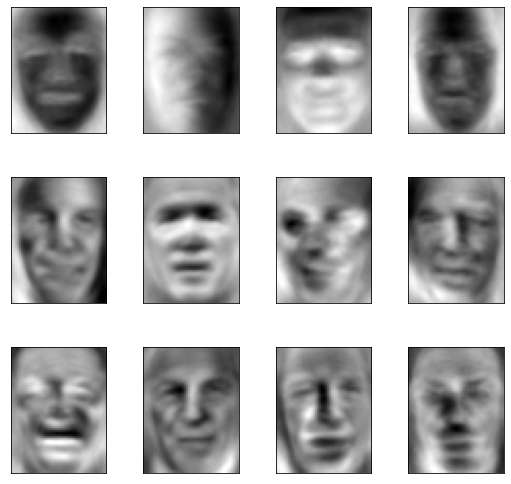

In [ ]:
pca = PCA(n_components=50)
pca.fit(X_train)
plot_gallery(np.reshape(pca.components_,(50,62,47)))

Questions:

Les vecteurs propres représentent: 

Les axes principaux dans l'espace d'entités, représentant les directions de variance maximale dans les données. Les composants sont triés par explication_variance_.

In [ ]:
print("La taille des vecteurs propres : ",len(pca.components_) )
pca.components_.shape

La taille des vecteurs propres :  50


(50, 2914)

In [ ]:
#3 . l’ACP des images de X_test (X_testC):
X_testC=pca.transform(X_test)
X_testC.shape

(322, 50)

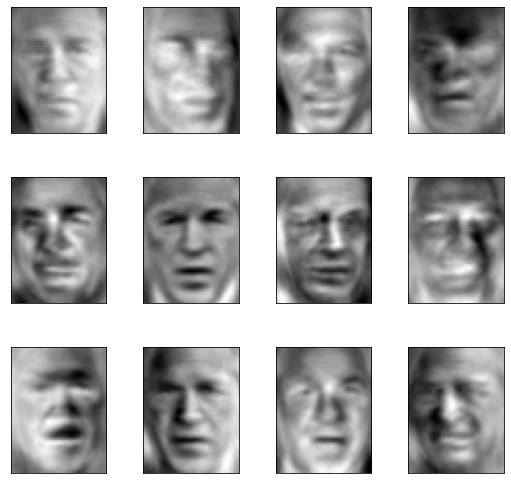

In [ ]:
X_testR_manuelle=np.dot(X_testC,pca.components_)
plot_gallery(np.reshape(X_testR_manuelle,(322,62,47)))

In [ ]:
#4 . Reconstruisez les images à partir X_testC pour obtenir les images X_testR:
X_testR=pca.inverse_transform(X_testC)

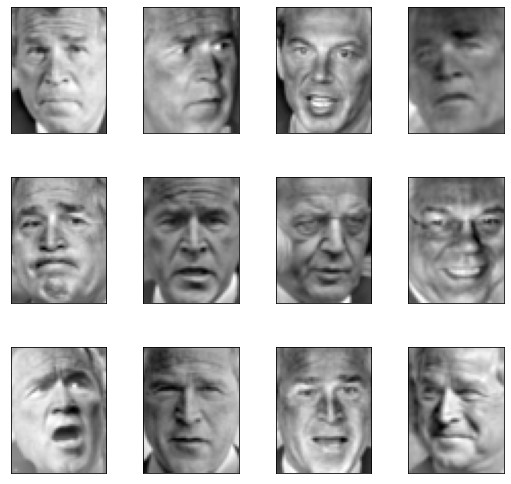

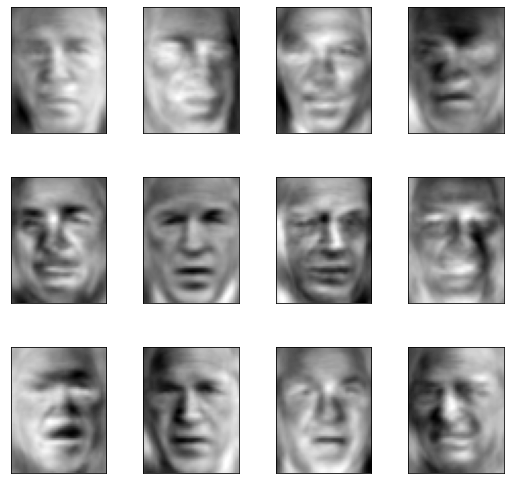

In [ ]:
plot_gallery(np.reshape(X_test,(322,62,47)))
plot_gallery(np.reshape(X_testR,(322,62,47)))

In [ ]:
#5. 
E= (X_testR-X_test)**2
E = np.mean(np.sqrt(np.sum(E,axis=0)))
E

7.499995

Questions: 

In [ ]:
print("le taux de compression = ", (2914/50)*0.01)

le taux de compression =  0.5828


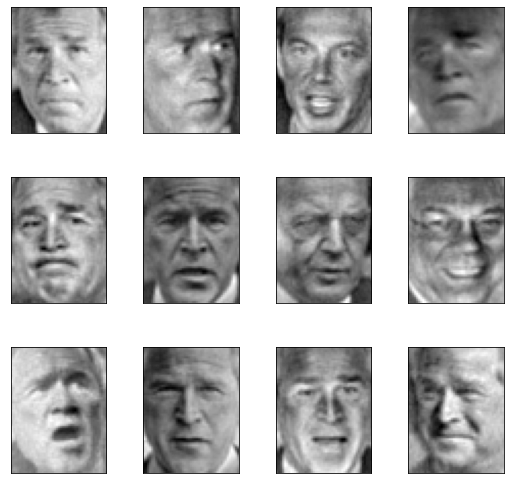

In [ ]:
#6.
E=[]
I=[]
for i in range(10,950,50):
  pca = PCA(n_components=i)
  pca.fit(X_train)
  X_testC=pca.transform(X_test)
  X_testR=pca.inverse_transform(X_testC)
  e=(X_testR-X_test)**2
  E.append(np.mean(np.sqrt(np.sum(e,axis=0))))
  I.append(i)
plot_gallery(np.reshape(X_testR,(322,62,47)))

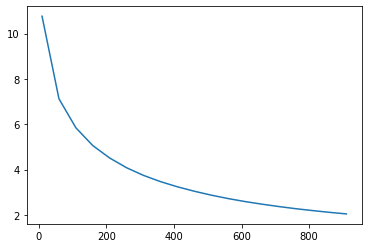

In [ ]:
plt.plot(I,E)